In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../../../data/National_education_cost/CP3-pub-4y-current-dollars.csv")
import warnings
warnings.filterwarnings("ignore")

# df.drop(["Unnamed: 23", ], axis=1, inplace=True)
df.head()

,State,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,...,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23,2023-24,1-Year % Change,5-Year % Change
0,Alabama,4510,4782,4906,5244,5968,6487,7373,8001,8734,...,10083,10650,10777,10922,10996,11338,11683,11890,0.02,0.10
1,Alaska,3435,3793,4194,4425,4678,4922,5261,5455,5785,...,7128,7440,7821,8233,8610,8815,9024,9163,0.02,0.17
2,Arizona,4078,4434,4674,4959,5584,6554,8075,9435,9728,...,10931,11210,11545,11879,11811,11820,12184,12583,0.03,0.09
3,Arkansas,4581,4980,5314,5599,5914,5980,6304,6654,6995,...,8254,8550,8701,9036,9078,9250,9478,9734,0.03,0.12
4,California,4195,4526,4549,4951,5436,6550,7485,8933,8986,...,9302,9800,9875,9854,9924,9943,10353,10641,0.03,0.08


In [3]:
df.columns

Index(['State', '2004-05', '2005-06', '2006-07', '  2007-08 ', '2008-09',
       '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15',
       '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21',
       '2021-22', '2022-23', '2023-24', '1-Year % Change', '5-Year % Change'],
      dtype='object')

In [4]:
melted_df = pd.melt(df, id_vars=["State", "1-Year % Change", "5-Year % Change"], var_name="Year", value_name="Tuition")
df = melted_df.sort_values(by=["State", "Year"]).reset_index(drop=True)

In [5]:
df

,State,1-Year % Change,5-Year % Change,Year,Tuition
0,Alabama,0.02,0.10,2007-08,5244
1,Alabama,0.02,0.10,2004-05,4510
2,Alabama,0.02,0.10,2005-06,4782
3,Alabama,0.02,0.10,2006-07,4906
4,Alabama,0.02,0.10,2008-09,5968
...,...,...,...,...,...
1015,Wyoming,0.04,0.24,2019-20,5581
1016,Wyoming,0.04,0.24,2020-21,5792
1017,Wyoming,0.04,0.24,2021-22,6097
1018,Wyoming,0.04,0.24,2022-23,6441


In [6]:
def replace_year(x):
    x=x.strip()
    current = x[:4]
    return current


df['Year'] = df['Year'].apply(replace_year)
df['Year'] = pd.to_datetime(df['Year']).dt.year
# df.dtypes
df = df.sort_values(by=["State", "Year"]).reset_index(drop=True)
df.head()

,State,1-Year % Change,5-Year % Change,Year,Tuition
0,Alabama,0.02,0.1,2004,4510
1,Alabama,0.02,0.1,2005,4782
2,Alabama,0.02,0.1,2006,4906
3,Alabama,0.02,0.1,2007,5244
4,Alabama,0.02,0.1,2008,5968


In [7]:
state_codes = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'District of Columbia': 'DC'
}

# Add state codes to the melted DataFrame
df['State_Code'] = df['State'].map(state_codes)
df

,State,1-Year % Change,5-Year % Change,Year,Tuition,State_Code
0,Alabama,0.02,0.10,2004,4510,AL
1,Alabama,0.02,0.10,2005,4782,AL
2,Alabama,0.02,0.10,2006,4906,AL
3,Alabama,0.02,0.10,2007,5244,AL
4,Alabama,0.02,0.10,2008,5968,AL
...,...,...,...,...,...,...
1015,Wyoming,0.04,0.24,2019,5581,WY
1016,Wyoming,0.04,0.24,2020,5792,WY
1017,Wyoming,0.04,0.24,2021,6097,WY
1018,Wyoming,0.04,0.24,2022,6441,WY


In [8]:
import plotly.express as px
column_selected = "Tuition"

map_figure = px.choropleth(
    data_frame=df,
    locations='State_Code',
    locationmode='USA-states',
    color=column_selected,
    animation_frame='Year',
    color_continuous_scale='YlOrRd',
    range_color=(df[column_selected].min(), df[column_selected].max()),
    title='4 years Schools tuition evolution',
    labels={'Tuition ($)': column_selected},
    hover_name = "State",
    hover_data = ["Tuition"]

)

map_figure.update_geos(showframe=False, showcoastlines=False, projection_type='albers usa', showocean=True, oceancolor="LightBlue")
map_figure.update_layout(
    width=800,
    height=600,
    transition_duration=2000
)
map_figure.write_html("../../../graphs/html/three/three-map.html")
map_figure.show()

In [9]:
#performing one way ANOVA

# Null hypothesis: Groups means are equal (no variation in means of groups)
# H0: μ1=μ2=…=μp
# Alternative hypothesis: At least, one group mean is different from other groups
# H1: All μ are not equal


from scipy.stats import f_oneway

groups = df['State'].unique()
group_data = [df[df['State'] == group]['Tuition'] for group in groups]

# Perform ANOVA
f_statistic, p_value = f_oneway(*group_data)

print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

F-Statistic: 21.1572536358935
P-Value: 7.566962007873423e-122


In [10]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_results = pairwise_tukeyhsd(df['Tuition'], df['State'])
# Convert Tukey's HSD results to DataFrame


In [11]:
print(tukey_results)

                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
       group1               group2        meandiff p-adj     lower      upper    reject
---------------------------------------------------------------------------------------
             Alabama               Alaska -2291.15 0.3139  -5004.7862   422.4862  False
             Alabama              Arizona   493.05    1.0  -2220.5862  3206.6862  False
             Alabama             Arkansas  -1280.1 0.9998  -3993.7362  1433.5362  False
             Alabama           California   -495.6    1.0  -3209.2362  2218.0362  False
             Alabama             Colorado     50.9    1.0  -2662.7362  2764.5362  False
             Alabama          Connecticut   2155.5 0.4741   -558.1362  4869.1362  False
             Alabama             Delaware   2271.5 0.3352   -442.1362  4985.1362  False
             Alabama District of Columbia -2058.45 0.5998  -4772.0862   655.1862  False
             Alabama            

In [12]:
tukey_df = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])

# Filter rows where reject is True
significant_differences = tukey_df[tukey_df['reject'] == True]
diff_mn = significant_differences[significant_differences['group1']=='Minnesota']


In [13]:
diff_mn

,group1,group2,meandiff,p-adj,lower,upper,reject
897,Minnesota,Mississippi,-3531.60,0.0002,-6245.2362,-817.9638,True
899,Minnesota,Montana,-3968.20,0.0000,-6681.8362,-1254.5638,True
900,Minnesota,Nebraska,-2906.45,0.0171,-5620.0862,-192.8138,True
901,Minnesota,Nevada,-4027.70,0.0000,-6741.3362,-1314.0638,True
902,Minnesota,New Hampshire,3542.50,0.0002,828.8638,6256.1362,True
904,Minnesota,New Mexico,-4066.50,0.0000,-6780.1362,-1352.8638,True
905,Minnesota,New York,-3314.15,0.0012,-6027.7862,-600.5138,True
906,Minnesota,North Carolina,-4182.90,0.0000,-6896.5362,-1469.2638,True
909,Minnesota,Oklahoma,-3267.20,0.0017,-5980.8362,-553.5638,True
914,Minnesota,South Dakota,-2913.85,0.0164,-5627.4862,-200.2138,True


In [14]:
import plotly.express as px

fig = px.bar(diff_mn, x='p-adj', y='group2', width=600)
fig.write_html("../../../graphs/html/three/tukey_test.html")
fig.show()

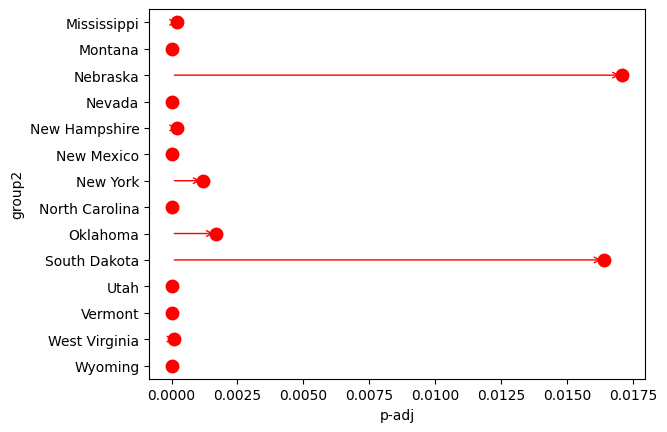

In [15]:
# sns.boxplot(x='Tuition', y='State', data=df, orient='h')
sns.stripplot(x='p-adj', y='group2', data=diff_mn, color='red', marker='o', size=10)

# Add arrows
for index, row in diff_mn.iterrows():
    plt.annotate("", xy=(row['p-adj'], row['group2']), xytext=(0, row['group2']),
                 arrowprops=dict(arrowstyle="->", color='red'))

plt.show()